In [86]:
#导入库并加载数据集路径
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sbn
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, Convolution2D, MaxPooling2D, BatchNormalization
%matplotlib inline
import os
for dirname, _, filenames in os.walk('E:/digits-input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#解决matplotlib显示中文问题
#指定默认字体
plt.rcParams['font.sans-serif']=['SimHei']
#解决保存图像是负号‘-’显示为方块的问题
plt.rcParams['axes.unicode_minus']=False

E:/digits-input\digit-recognizer\sample_submission.csv
E:/digits-input\digit-recognizer\test.csv
E:/digits-input\digit-recognizer\train.csv


In [59]:
#加载训练、测试数据集
dt_train = pd.read_csv('E:/digits-input/digit-recognizer/train.csv')
dt_test = pd.read_csv('E:/digits-input/digit-recognizer/test.csv')
#将训练数据集复制一份并赋予变量data_train_pd
dt_train_cp = dt_train.copy()
#获取训练集的label列的值
#删除训练集中的label这一列
true_labels = dt_train.label 
dt_train = dt_train.drop('label', axis = 1)
#对训练、测试数据集的格式进行变化（将n个784个向量，变成n个28*28的），并重新赋予最初变量
dt_train = dt_train.values.reshape(-1, 28, 28, 1) 
dt_test = dt_test.values.reshape(-1, 28, 28, 1)   

In [60]:
#可视化数据

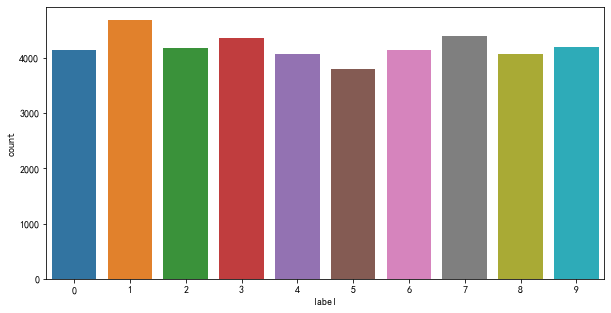

In [61]:
#对训练数据集中的label列变量的值进行统计 sns.countplot(x = true_labels, palette = 'rocket')  
plt.figure(figsize=(10,5))
sbn.countplot(x = true_labels)  
plt.show()

In [62]:
#可视化数据集

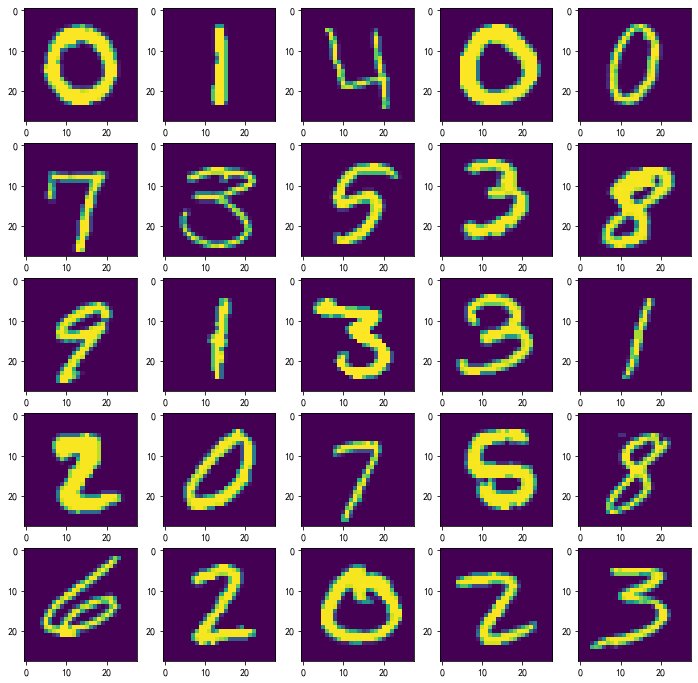

In [63]:
#将训练数据集中的每张图片展现出来（图片的数据以像素保存在.csv文件中）
fg = plt.figure(figsize=(12, 12))
for i in range(1, 26, 1):
    plt.subplot(5, 5, i)
    plt.imshow(dt_train[i])  

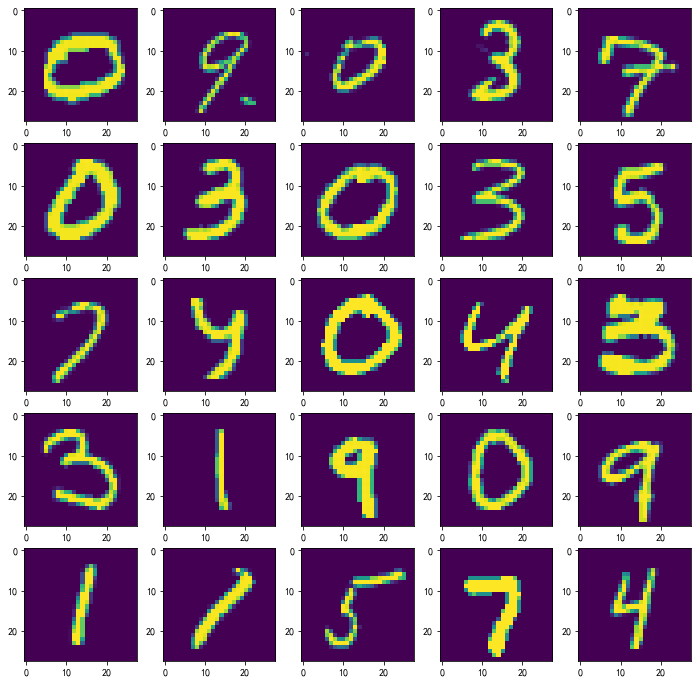

In [64]:
#将测试数据集中的每张图片展现出来（图片的数据以像素保存在.csv文件中）
fg = plt.figure(figsize=(12, 12))
for i in range(1, 26, 1):
    plt.subplot(5, 5, i)
    plt.imshow(dt_test[i])

In [65]:
#t-SNE算法
sp= dt_train_cp.sample(n=10000, random_state=17)  
#使用sklearn中实现的算法
from sklearn.manifold import TSNE
#TSNE实现降维及可视化
sp= dt_train_cp.sample(n=10000, random_state=17)  #取部分数据
t_sne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
dt_train_embedded = t_sne.fit_transform(sp.drop('label', axis = 1))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.009s...
[t-SNE] Computed neighbors for 10000 samples in 4.530s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 441.906187
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.387802
[t-SNE] KL divergence after 300 iterations: 2.863649


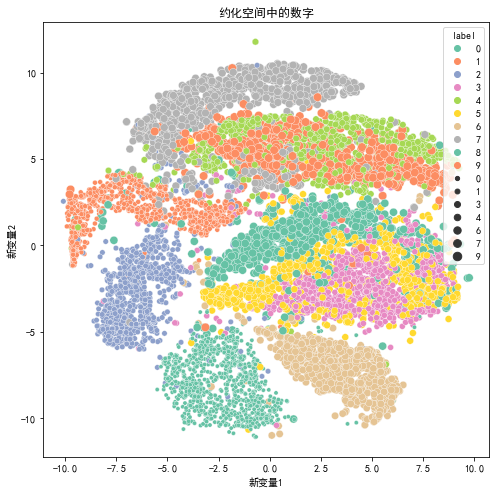

In [66]:
#可视化结果
plt.figure(figsize=(8, 8))
plt.xlabel("新变量1")
plt.title("约化空间中的数字")
plt.ylabel("新变量2")
#绘制散点图，x轴为降维之后的第一列，y轴为降维之后的第二列
sbn.scatterplot(x = dt_train_embedded[:,0], y=dt_train_embedded[:,1], hue=sp.label,size=sp.label,legend=True, palette='Set2')
plt.show()

In [67]:
#朴素贝叶斯分类

In [68]:
#建立基础模型
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB
#拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(dt_train_cp.drop('label', axis = 1), dt_train_cp.label, 
                                                     test_size = 0.25, random_state=0)
bnbclf = BernoulliNB()#得到最初的贝叶斯分类器
bnbclf.fit(X_train, y_train)# 用训练数据拟合分类器模型 

BernoulliNB()

In [69]:
#它用你训练好的模型在测试集上进行评分（0~1），1分代表最好，bnbclf.score(X_holdout, y_holdout)
print("Accuracy score: {:.2f}".format(bnbclf.score(X_test, y_test)))
print("Cross-entropy loss: {:.2f}".format(log_loss(np.array(y_test), bnbclf.predict_proba(X_test))))

Accuracy score: 0.84
Cross-entropy loss: 3.17


In [70]:
#可视化错误

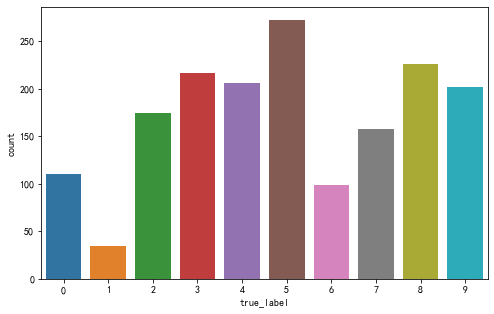

In [71]:
#构建Dataframe对象（包含正确数据列、预测数据列）
dt_rt = pd.DataFrame({'true_label' : y_test, 'predicted' : bnbclf.predict(X_test)})
es = dt_rt[dt_rt.true_label != dt_rt.predicted]#取正确数据列、预测数据列不相等的数据并形成datafrme对象
plt.figure(figsize=(8,5))
sbn.countplot(x = es.true_label)#错误的统计
plt.show()

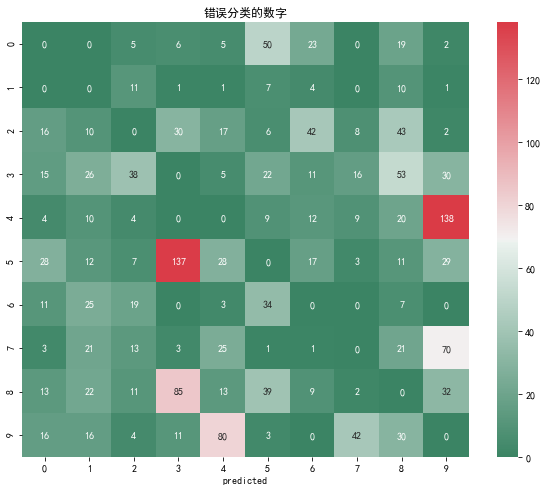

In [72]:
plt.figure(figsize=(10,8))
plt.title('错误分类的数字')
#diverging_palette在两个 HUSL 颜色直接建立一个发散调色板。
cp = sbn.diverging_palette(150, 10, as_cmap=True)
#heatmap构建热力图
sbn.heatmap(pd.crosstab(es['true_label'],es['predicted']).reset_index().drop('true_label', axis = 1),annot=True,fmt="d",cmap=cp)
plt.show()

In [73]:
#卷积神经网络

In [74]:
#第一步：选择模型
#Keras基础--序贯模型（sequential）
sq_model = Sequential()
#第二步：构建网络层
sq_model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
sq_model.add(MaxPooling2D(pool_size=(2,2)))
sq_model.add(BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",))
sq_model.add(Convolution2D(32, (3, 3), activation='relu'))
sq_model.add(MaxPooling2D(pool_size=(2,2)))
sq_model.add(BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",))
sq_model.add(Dropout(0.25))
sq_model.add(Flatten())
sq_model.add(Dense(128, activation='relu'))
sq_model.add(Dropout(0.5))
sq_model.add(Dense(10, activation='softmax'))

In [75]:
#缩放数据
dt_train = dt_train / 255
dt_test = dt_test / 255
#pd.get_dummies()，则恰将 string 转换为 integers 类型(对训练数据集的label列)
y = np.array(pd.get_dummies(true_labels))

In [76]:
#模型训练

In [77]:
#拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(dt_train, y,test_size = 0.25, random_state=17)
#ReduceLROnPlateau:当评价指标不在提升时，减少学习率
#   第三步：编译
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5, min_lr=0.000001,verbose=1)

In [78]:
#loss='categorical_crossentropy'损失函数（使用交叉熵作为loss函数）
sq_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#开始训练（拟合）网络
#   第四步：训练
result = sq_model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test), callbacks = [reduce_lr])

Epoch 1/10
985/985 [==============================] - 25s 26ms/step - loss: 0.3269 - accuracy: 0.8965 - val_loss: 0.0780 - val_accuracy: 0.9757
Epoch 2/10
985/985 [==============================] - 24s 25ms/step - loss: 0.1179 - accuracy: 0.9642 - val_loss: 0.0553 - val_accuracy: 0.9820
Epoch 3/10
985/985 [==============================] - 26s 26ms/step - loss: 0.0915 - accuracy: 0.9723 - val_loss: 0.0485 - val_accuracy: 0.9842
Epoch 4/10
985/985 [==============================] - 26s 26ms/step - loss: 0.0771 - accuracy: 0.9763 - val_loss: 0.0518 - val_accuracy: 0.9840
Epoch 5/10
985/985 [==============================] - 27s 27ms/step - loss: 0.0688 - accuracy: 0.9789 - val_loss: 0.0417 - val_accuracy: 0.9876
Epoch 6/10
985/985 [==============================] - 26s 26ms/step - loss: 0.0600 - accuracy: 0.9817 - val_loss: 0.0493 - val_accuracy: 0.9856
Epoch 7/10
985/985 [==============================] - 25s 25ms/step - loss: 0.0542 - accuracy: 0.9831 - val_loss: 0.0382 - val_accuracy:

In [ ]:
#对上面算出的结果进行分析且可视化

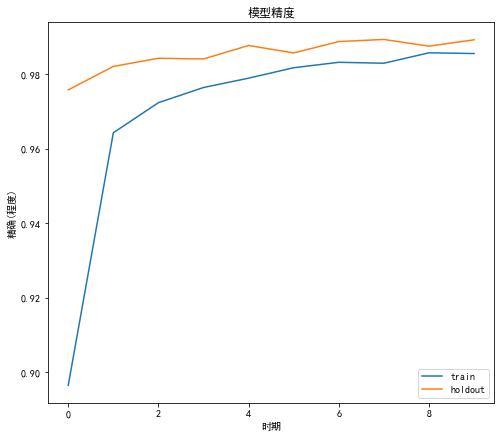

In [79]:
#学习曲线
#我们可以看到学习的进步。
plt.figure(figsize=(8, 7))
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('模型精度')
plt.ylabel('精确(程度)')
plt.xlabel('时期')
plt.legend(['train', 'holdout'], loc='lower right')
plt.show()

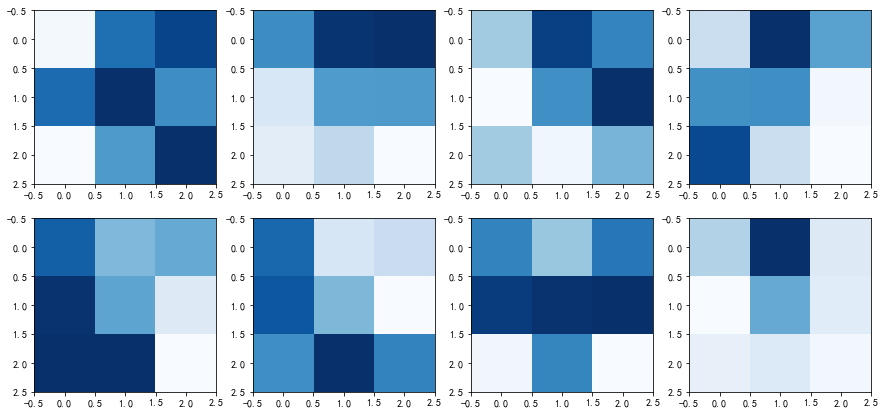

In [80]:
#可视化过滤器
filters , bias = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)
n_filters = 8
ix=1
fig = plt.figure(figsize=(15,30))
for i in range(n_filters):
    plt.subplot(n_filters,4,ix)
    plt.imshow(filters[:,:,:,i] ,cmap='Blues', aspect='auto')
    ix+=1
plt.show()

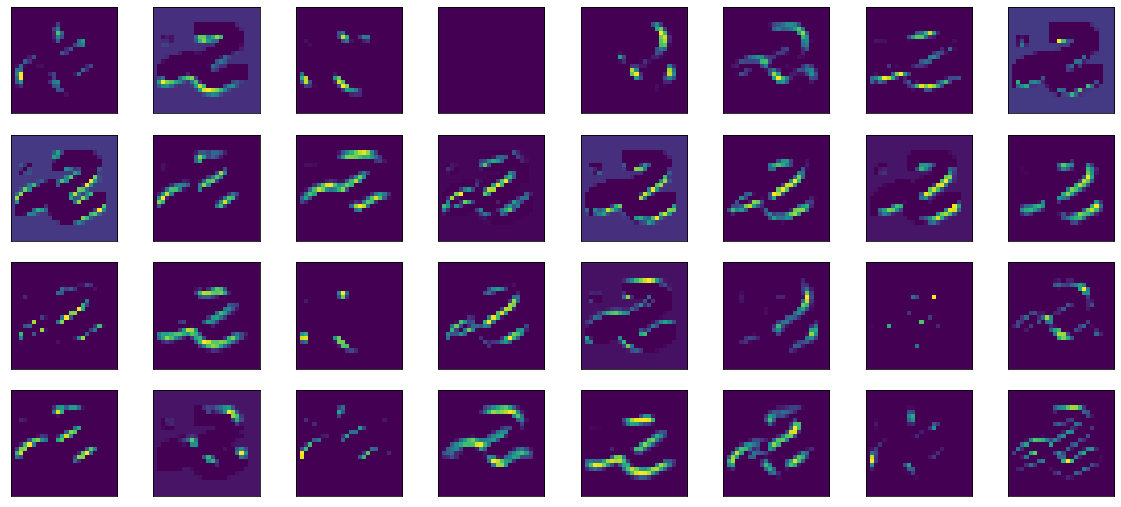

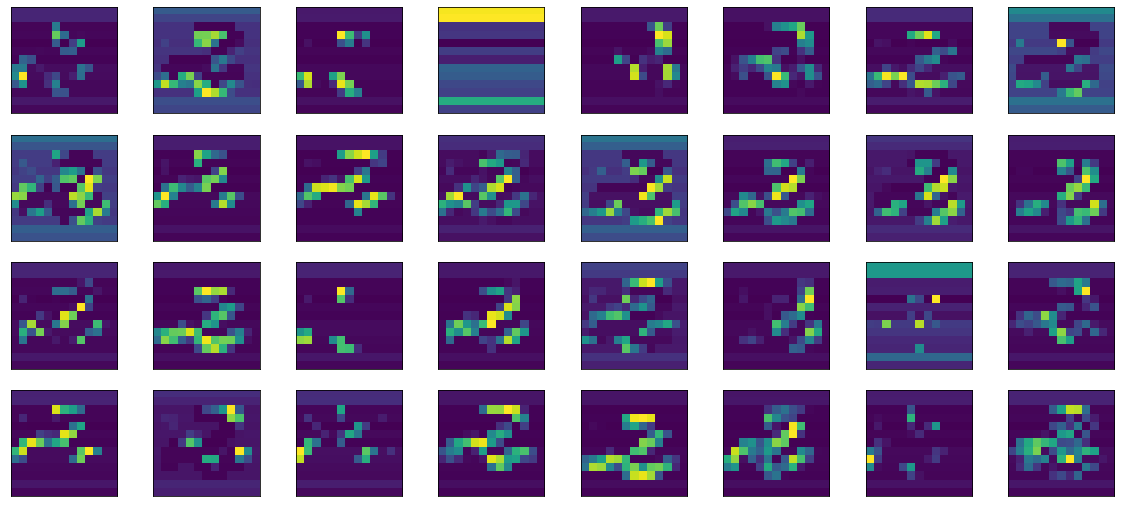

In [81]:
#可视化要素地图
from tensorflow.keras.models import Model
layer_names = [layer.name for layer in model.layers]
layer_outputs = [layer.output for layer in model.layers]
layer_outputs = [layer_outputs[0], layer_outputs[2]]
feature_map_model = Model(model.input, layer_outputs)
im = X_train[99:100,:]
feature_maps = feature_map_model.predict(im)
for i in range(2):
    ix = 1
    plt.figure(figsize=(20,9))
    for j in range(feature_maps[i].shape[3]):
        im = feature_maps[i]
        ax = plt.subplot(4, 8, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(im[0,:,:,j])
        ix += 1
    plt.show()

In [82]:
#改进模型

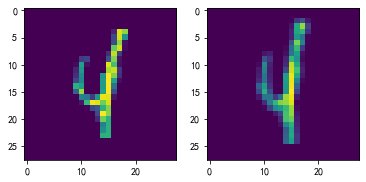

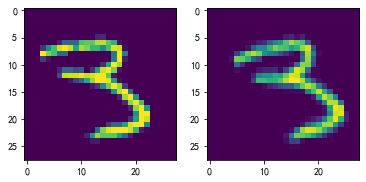

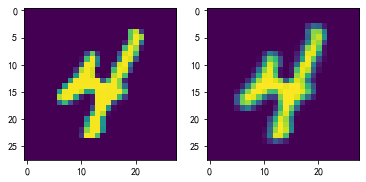

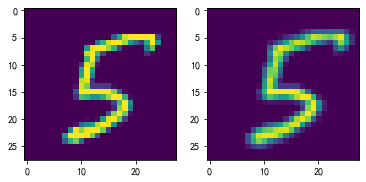

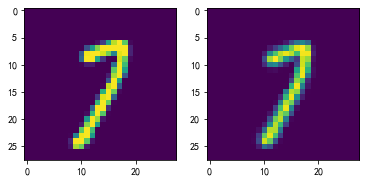

In [83]:
#构建图像数据生成器
augumentator=tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=15,width_shift_range=0.15,shear_range=0.1,zoom_range=0.1,
validation_split=0.0,horizontal_flip=False,vertical_flip=False)
augumentator.fit(X_train)
#想象一个预兆的图像
fig.suptitle("Title centered above all subplots", fontsize=14)
for _ in range(5):
    ind = np.random.randint(10000)
    im = X_train[ind:ind+1,:][0]
    plt.subplot(1, 2, 1)
    plt.imshow(im)
    plt.subplot(1, 2, 2)
    plt.imshow(augumentator.random_transform(im))
    plt.show()

In [84]:
#预兆数据集培训
#开始训练（拟合）网络
new_result=model.fit(augumentator.flow(X_train, y_train,batch_size = 32),epochs=10,validation_data = (X_test, y_test), 
verbose = 1, callbacks = [reduce_lr])

Epoch 1/10
985/985 [==============================] - 28s 29ms/step - loss: 0.0760 - accuracy: 0.9777 - val_loss: 0.0307 - val_accuracy: 0.9905
Epoch 2/10
985/985 [==============================] - 28s 28ms/step - loss: 0.0765 - accuracy: 0.9769 - val_loss: 0.0349 - val_accuracy: 0.9904
Epoch 3/10
985/985 [==============================] - 28s 28ms/step - loss: 0.0734 - accuracy: 0.9786 - val_loss: 0.0334 - val_accuracy: 0.9905
Epoch 4/10
985/985 [==============================] - 28s 28ms/step - loss: 0.0707 - accuracy: 0.9784 - val_loss: 0.0348 - val_accuracy: 0.9905
Epoch 5/10
985/985 [==============================] - 28s 28ms/step - loss: 0.0717 - accuracy: 0.9782 - val_loss: 0.0303 - val_accuracy: 0.9916
Epoch 6/10
985/985 [==============================] - 28s 28ms/step - loss: 0.0669 - accuracy: 0.9789 - val_loss: 0.0318 - val_accuracy: 0.9905
Epoch 7/10
985/985 [==============================] - 29s 29ms/step - loss: 0.0699 - accuracy: 0.9789 - val_loss: 0.0304 - val_accuracy:

In [85]:
prd_dt = model.predict(dt_test).argmax(axis = 1)
prd_dt
submission = pd.DataFrame({'ImageId':np.arange(1, len(prd_dt)+1), 'Label':prd_dt})
submission.to_csv('E:/digits-input/提交.csv', index=False)
'写入成功'

'写入成功'